In [ ]:
import mlflow
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [1]:

mlflow.set_tracking_uri("file:///G:/Mi unidad/Mi CIUP/LOS REALES CODIGOS/VRI/mlruns") 


NameError: name 'mlflow' is not defined

In [6]:
# Cargar el experimento por nombre o ID
experiment = mlflow.get_experiment_by_name("Prueba_cero")
print("ID del experimento:", experiment.experiment_id)

ID del experimento: 195475900906156264


In [7]:
runs_df = mlflow.search_runs(experiment_ids=[experiment.experiment_id])

In [8]:
runs_df.head()

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.f1_score,metrics.accuracy,params.model,params.reducer,params.column,params.n_dim,tags.mlflow.user,tags.mlflow.source.name,tags.mlflow.source.git.commit,tags.mlflow.runName,tags.mlflow.source.type
0,5a142b0e19d14cdabf30db11d1fbc718,195475900906156264,FINISHED,file:///G:/Mi unidad/Mi CIUP/LOS REALES CODIGO...,2025-10-05 21:27:50.678000+00:00,2025-10-05 21:29:25.583000+00:00,0.477935,0.497238,svm,pca,Embedding_Concat2,16,JC.RuedaH,src/experiment.py,27bb25d012df959023b43f6b5ba5a7a5d3e42435,Embedding_Concat2_pca_16_svm,LOCAL
1,c28f837687f447e28e19af5331a2ed43,195475900906156264,FINISHED,file:///G:/Mi unidad/Mi CIUP/LOS REALES CODIGO...,2025-10-05 21:26:13.755000+00:00,2025-10-05 21:27:50.163000+00:00,0.478708,0.501381,svm,pca,Embedding_Concat1,16,JC.RuedaH,src/experiment.py,27bb25d012df959023b43f6b5ba5a7a5d3e42435,Embedding_Concat1_pca_16_svm,LOCAL
2,3588b53732ce4bc78596b47878f8882e,195475900906156264,FINISHED,file:///G:/Mi unidad/Mi CIUP/LOS REALES CODIGO...,2025-10-05 21:24:38.838000+00:00,2025-10-05 21:26:13.183000+00:00,0.509477,0.534530,svm,pca,Embedding_Respuesta,16,JC.RuedaH,src/experiment.py,27bb25d012df959023b43f6b5ba5a7a5d3e42435,Embedding_Respuesta_pca_16_svm,LOCAL
3,9d729a5a7e7b44a595b7cf7df0af9e60,195475900906156264,FINISHED,file:///G:/Mi unidad/Mi CIUP/LOS REALES CODIGO...,2025-10-05 21:22:49.811000+00:00,2025-10-05 21:24:25.425000+00:00,0.428018,0.455801,svm,pca,Embedding_Concat2,8,JC.RuedaH,src/experiment.py,27bb25d012df959023b43f6b5ba5a7a5d3e42435,Embedding_Concat2_pca_8_svm,LOCAL
4,953d702479f64f45873037b84caec741,195475900906156264,FINISHED,file:///G:/Mi unidad/Mi CIUP/LOS REALES CODIGO...,2025-10-05 21:21:13.870000+00:00,2025-10-05 21:22:49.313000+00:00,0.426172,0.455801,svm,pca,Embedding_Concat1,8,JC.RuedaH,src/experiment.py,27bb25d012df959023b43f6b5ba5a7a5d3e42435,Embedding_Concat1_pca_8_svm,LOCAL


In [11]:
df_selected = runs_df[['params.column', 'params.reducer', 'params.model','params.n_dim' ,'metrics.f1_score', 'metrics.accuracy']]
df_selected

,params.column,params.reducer,params.model,params.n_dim,metrics.f1_score,metrics.accuracy
0,Embedding_Concat2,pca,svm,16,0.477935,0.497238
1,Embedding_Concat1,pca,svm,16,0.478708,0.501381
2,Embedding_Respuesta,pca,svm,16,0.509477,0.534530
3,Embedding_Concat2,pca,svm,8,0.428018,0.455801
4,Embedding_Concat1,pca,svm,8,0.426172,0.455801
...,...,...,...,...,...,...
150,Embedding_Respuesta,pca,rf,10,0.611726,0.617403
151,Embedding_Concat2,pca,rf,10,0.632168,0.635359
152,Embedding_Concat1,pca,rf,10,0.639300,0.642265
153,Embedding_Respuesta,pca,rf,10,0.614060,0.621547


g:\Mi unidad\Mi CIUP\LOS REALES CODIGOS\VRI\.venv\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)
g:\Mi unidad\Mi CIUP\LOS REALES CODIGOS\VRI\.venv\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)
g:\Mi unidad\Mi CIUP\LOS REALES CODIGOS\VRI\.venv\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)
g:\Mi unidad\Mi CIUP\LOS REALES CODIGOS\VRI\.venv\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is depr

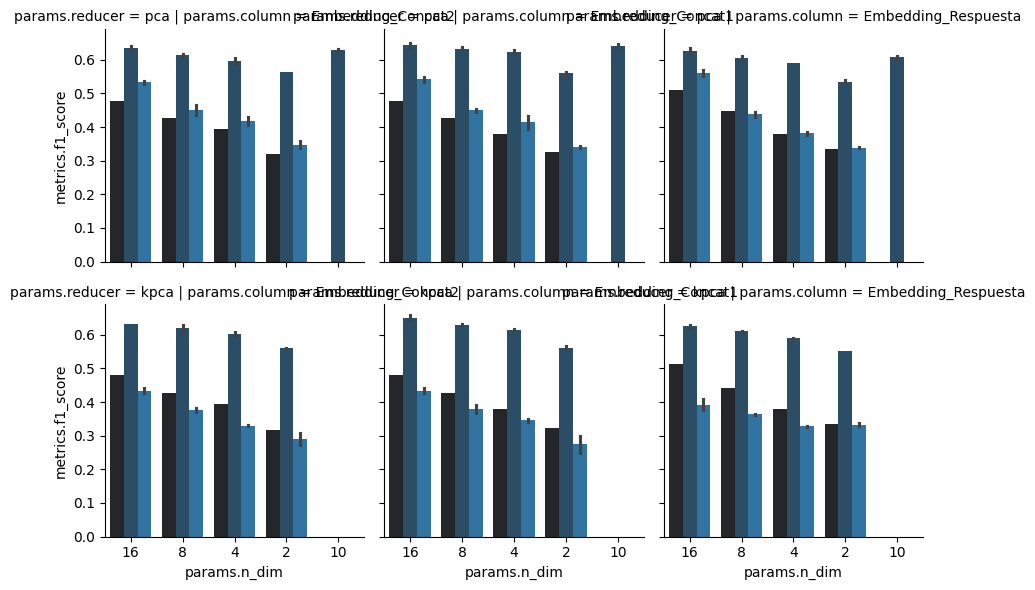

In [14]:
sns.FacetGrid(df_selected,col='params.column', row='params.reducer').map_dataframe(sns.barplot,x='params.n_dim',y='metrics.f1_score', hue='params.model')